In [1]:
import os
import tensorflow as tf
import tensorflow.python.keras

/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# propriatary mnist management
DATASETSLIB_HOME = './datasetslib'
import sys
if not DATASETSLIB_HOME in sys.path:
    sys.path.append(DATASETSLIB_HOME)
%reload_ext autoreload
%autoreload 2
import datasetslib

from datasetslib import util as dsu

In [3]:
datasetslib.datasets_root = os.path.join(os.path.expanduser('~'),'datasets')

In [ ]:
import sklearn.datasets.

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(os.path.join(datasetslib.datasets_root, 'mnist'),
                                  one_hot=True)

Extracting /home/hackerman/datasets/mnist/train-images-idx3-ubyte.gz
Extracting /home/hackerman/datasets/mnist/train-labels-idx1-ubyte.gz
Extracting /home/hackerman/datasets/mnist/t10k-images-idx3-ubyte.gz
Extracting /home/hackerman/datasets/mnist/t10k-labels-idx1-ubyte.gz


In [76]:
X_train = mnist.train.images
X_test = mnist.test.images
Y_train = mnist.train.labels
Y_test = mnist.test.labels

In [6]:
num_outputs = 10 # image classes
num_inputs = 784 # size of flattened image



In [7]:
"w_{0:04d}".format(55545)

'w_55545'

In [17]:
def mlp(x, num_inputs, num_outputs, num_layers, num_neurons):
    w = []
    b = []
    for i in range(num_layers):
        # weights
        w.append(tf.Variable(tf.random_normal(
            [num_inputs if i == 0 else num_neurons[i - 1],
             num_neurons[i]]),
            name="w_{0:04d}".format(i)
        ))
        # biases
        b.append(tf.Variable(tf.random_normal(
            [num_neurons[i]]),
            name="b_{0:04d}".format(i)
        ))
    w.append(tf.Variable(tf.random_normal(
        [num_neurons[num_layers - 1] if num_layers > 0 else num_inputs,
         num_outputs]), name="w_out"))
    b.append(tf.Variable(tf.random_normal([num_outputs]), name="b_out"))

    # x is input layer
    layer = x
    # add hidden layers
    for i in range(num_layers):
        layer = tf.nn.relu(tf.matmul(layer, w[i]) + b[i])
    # add output layer
    layer = tf.matmul(layer, w[num_layers]) + b[num_layers]

    return layer

In [18]:
def mnist_batch_func(batch_size=100):
    X_batch, Y_batch = mnist.train.next_batch(batch_size)
    return [X_batch, Y_batch]

In [40]:
def tensorflow_classification( n_epochs, n_batches, batch_size, batch_func, model, optimizer, loss, accuracy_function,
                             X_test, y_test):
    with tf.Session() as tfs:
        tf.global_variables_initializer().run()
        for epoch in range(n_epochs):
            epoch_loss = 0.0
            for batch in range(n_batches):
                X_train, y_train = batch_func(batch_size)
                feed_dict = {x:X_train,y:y_train}
                _, batch_loss = tfs.run([optimizer,loss],feed_dict=feed_dict)
                epoch_loss += batch_loss
            average_loss = batch_loss / n_batches
            print('epoch: {0:04d} loss = {1:0.6f}'.format(epoch, average_loss))
        # evaluating accuracy of model
        feed_dict = {x:X_test,y:y_test}
        accuracy_score = tfs.run(accuracy_function,feed_dict=feed_dict)
        print('accuracy={0:.8f}'.format(accuracy_score))
        
        

In [41]:
tf.reset_default_graph()

In [42]:

x = tf.placeholder(dtype=tf.float32,shape=[None,num_inputs],name='x')
y = tf.placeholder(dtype=tf.float32,shape=[None,num_outputs],name='y')

num_layers = 0
num_neurons = []
learning_rate = 0.01
n_epochs = 50
batch_size = 100
n_batches = int(mnist.train.num_examples/batch_size)

model = mlp(x=x,
            num_inputs=num_inputs,
            num_outputs=num_outputs,
            num_layers=num_layers,
            num_neurons=num_neurons)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

prediction_check=tf.equal(tf.argmax(model,1),tf.argmax(y,1))
accuracy_function = tf.reduce_mean(tf.cast(prediction_check,tf.float32))

tensorflow_classification(n_epochs=n_epochs,
    n_batches=n_batches,
    batch_size=batch_size,
    batch_func=mnist_batch_func,
    model = model,
    optimizer = optimizer,
    loss = loss,
    accuracy_function = accuracy_function,
    X_test = mnist.test.images,
    y_test = mnist.test.labels
)



epoch: 0000 loss = 0.009326
epoch: 0001 loss = 0.007104
epoch: 0002 loss = 0.005698
epoch: 0003 loss = 0.003641
epoch: 0004 loss = 0.003694
epoch: 0005 loss = 0.002356
epoch: 0006 loss = 0.002393
epoch: 0007 loss = 0.002766
epoch: 0008 loss = 0.002776
epoch: 0009 loss = 0.001864
epoch: 0010 loss = 0.003413
epoch: 0011 loss = 0.002013
epoch: 0012 loss = 0.002048
epoch: 0013 loss = 0.003716
epoch: 0014 loss = 0.002628
epoch: 0015 loss = 0.002049
epoch: 0016 loss = 0.001612
epoch: 0017 loss = 0.001740
epoch: 0018 loss = 0.001519
epoch: 0019 loss = 0.000880
epoch: 0020 loss = 0.002384
epoch: 0021 loss = 0.001315
epoch: 0022 loss = 0.001029
epoch: 0023 loss = 0.002015
epoch: 0024 loss = 0.001260
epoch: 0025 loss = 0.000866
epoch: 0026 loss = 0.001562
epoch: 0027 loss = 0.000724
epoch: 0028 loss = 0.000837
epoch: 0029 loss = 0.001487
epoch: 0030 loss = 0.002126
epoch: 0031 loss = 0.001531
epoch: 0032 loss = 0.002336
epoch: 0033 loss = 0.000812
epoch: 0034 loss = 0.001146
epoch: 0035 loss = 0

## Now lets do it with keras

In [47]:
import tensorflow.python.keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import SGD

In [48]:
num_layers = 2
num_neurons =[]
for i in range(num_layers):
    num_neurons.append(256)
learning_rate = .01
n_epochs = 50
batch_size = 100

In [50]:
model = Sequential()
model.add(Dense(units=num_neurons[0],activation='relu',input_shape=(num_inputs,)))
model.add(Dense(units=num_neurons[1],activation='relu'))
model.add(Dense(units=num_outputs,activation='softmax'))
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=learning_rate),
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [55]:
model.fit(X_train,Y_train,batch_size=batch_size,epochs=n_epochs)

Epoch 1/50
55000/55000 [==============================]55000/55000 [==============================] - 18s 323us/step - loss: 1.1171 - acc: 0.7366

Epoch 2/50
55000/55000 [==============================]55000/55000 [==============================] - 17s 310us/step - loss: 0.4401 - acc: 0.8830

Epoch 3/50
55000/55000 [==============================]55000/55000 [==============================] - 23s 418us/step - loss: 0.3551 - acc: 0.9003

Epoch 4/50
55000/55000 [==============================]55000/55000 [==============================] - 27s 489us/step - loss: 0.3164 - acc: 0.9108

Epoch 5/50
55000/55000 [==============================]55000/55000 [==============================] - 24s 438us/step - loss: 0.2907 - acc: 0.9178

Epoch 6/50
55000/55000 [==============================]55000/55000 [==============================] - 29s 527us/step - loss: 0.2705 - acc: 0.9231

Epoch 7/50
55000/55000 [==============================]55000/55000 [==============================] - 26s 468us/step -

In [56]:
score = model.evaluate(X_test,Y_test)
print('\n\nTest loss :{}'.format(score[0]))
print('Test accuracy :{}'.format(score[1]))

10000/10000 [==============================]10000/10000 [==============================] - 3s 253us/step



Test loss :0.0895692008530721
Test accuracy :0.974


In [78]:
tf.reset_default_graph()

In [79]:
num_layers = 2
num_neurons = []
for i in range(num_layers):
    num_neurons.append(256)
    
learning_rate = 0.01
n_epochs = 50
batch_size = 100


In [80]:
# Build deep neural network
input_layer = tflearn.input_data(shape=[None, num_inputs])
dense1 = tflearn.fully_connected(input_layer, num_neurons[0], activation='relu')
dense2 = tflearn.fully_connected(dense1, num_neurons[1], activation='relu')
softmax = tflearn.fully_connected(dense2, num_outputs, activation='softmax')

In [81]:
optimizer = tflearn.SGD(learning_rate=learning_rate)
net = tflearn.regression(softmax,optimizer=optimizer,
                        metric=tflearn.Accuracy(),
                        loss = 'categorical_crossentropy')
model = tflearn.DNN(net)

In [82]:
model.fit(X_train, Y_train,
          n_epoch=n_epochs,
          batch_size=batch_size,
          show_metric=True,
          run_id='dense_model')

Training Step: 27499  | total loss: 0.09633 | time: 17.335s
| SGD | epoch: 050 | loss: 0.09633 - acc: 0.9737 -- iter: 54900/55000
Training Step: 27500  | total loss: 0.09236 | time: 17.363s
| SGD | epoch: 050 | loss: 0.09236 - acc: 0.9763 -- iter: 55000/55000
--


In [83]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[0])

Test accuracy: 0.9669


# Time Series Multi-Layer Perceptron

In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [38]:
filename = os.path.join(datasetslib.datasets_root,'international-airline-passengers.csv')
dataframe = pd.read_csv(filename,usecols=[1],header=0)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [39]:
scaler = MinMaxScaler(feature_range=(0,1))
normalized_dataset = scaler.fit_transform(dataset)

In [40]:
train,test=dsu.train_test_split(normalized_dataset,train_size=0.67)
print(len(train), len(test))


96 48


In [41]:
n_x=2
n_y=1
X_train, Y_train, X_test, Y_test = dsu.mvts_to_xy(train,test,n_x=n_x,n_y=n_y)

In [53]:
Y_train

array([[0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374519],
       [0.17760617],
       [0.177

In [43]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import SGD
from tensorflow.python import keras

In [44]:
tf.reset_default_graph()
keras.backend.clear_session()

In [45]:
num_layers = 2
num_neurons = [8,8]
n_epochs = 50
batch_size = 2

In [46]:
model = Sequential()
# Dense(number of neurons, activation, shape of input to layers)
model.add(Dense(num_neurons[0],activation='relu',input_shape=(n_x,)))
# shape is not needed after first layer
model.add(Dense(num_neurons[1],activation='relu'))
model.add(Dense(units=1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [47]:
X_train

array([[0.01544401, 0.02702703],
       [0.02702703, 0.05405405],
       [0.05405405, 0.04826255],
       [0.04826255, 0.03281853],
       [0.03281853, 0.05984557],
       [0.05984557, 0.08494207],
       [0.08494207, 0.08494207],
       [0.08494207, 0.06177607],
       [0.06177607, 0.02895753],
       [0.02895753, 0.        ],
       [0.        , 0.02702703],
       [0.02702703, 0.02123553],
       [0.02123553, 0.04247104],
       [0.04247104, 0.07142857],
       [0.07142857, 0.05984557],
       [0.05984557, 0.04054055],
       [0.04054055, 0.08687258],
       [0.08687258, 0.12741312],
       [0.12741312, 0.12741312],
       [0.12741312, 0.10424709],
       [0.10424709, 0.05598456],
       [0.05598456, 0.01930502],
       [0.01930502, 0.06949806],
       [0.06949806, 0.07915059],
       [0.07915059, 0.08880308],
       [0.08880308, 0.14285713],
       [0.14285713, 0.11389962],
       [0.11389962, 0.13127413],
       [0.13127413, 0.14285713],
       [0.14285713, 0.18339768],
       [0.

In [48]:
# compile( loss , optimizer)
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [49]:
X_train

array([[0.01544401, 0.02702703],
       [0.02702703, 0.05405405],
       [0.05405405, 0.04826255],
       [0.04826255, 0.03281853],
       [0.03281853, 0.05984557],
       [0.05984557, 0.08494207],
       [0.08494207, 0.08494207],
       [0.08494207, 0.06177607],
       [0.06177607, 0.02895753],
       [0.02895753, 0.        ],
       [0.        , 0.02702703],
       [0.02702703, 0.02123553],
       [0.02123553, 0.04247104],
       [0.04247104, 0.07142857],
       [0.07142857, 0.05984557],
       [0.05984557, 0.04054055],
       [0.04054055, 0.08687258],
       [0.08687258, 0.12741312],
       [0.12741312, 0.12741312],
       [0.12741312, 0.10424709],
       [0.10424709, 0.05598456],
       [0.05598456, 0.01930502],
       [0.01930502, 0.06949806],
       [0.06949806, 0.07915059],
       [0.07915059, 0.08880308],
       [0.08880308, 0.14285713],
       [0.14285713, 0.11389962],
       [0.11389962, 0.13127413],
       [0.13127413, 0.14285713],
       [0.14285713, 0.18339768],
       [0.

In [50]:
# fit (input, output, batch_size, batch_number)
history = model.fit(X_train,Y_train,batch_size=batch_size,epochs=n_epochs)

Epoch 1/50
94/94 [==============================]94/94 [==============================] - 1s 11ms/step - loss: 0.0100 - acc: 0.0106

Epoch 2/50
94/94 [==============================]94/94 [==============================] - 0s 4ms/step - loss: 0.0031 - acc: 0.0106

Epoch 3/50
94/94 [==============================]94/94 [==============================] - 0s 4ms/step - loss: 0.0025 - acc: 0.0106

Epoch 4/50
94/94 [==============================]94/94 [==============================] - 0s 4ms/step - loss: 0.0023 - acc: 0.0106

Epoch 5/50
94/94 [==============================]94/94 [==============================] - 0s 4ms/step - loss: 0.0021 - acc: 0.0106

Epoch 6/50
94/94 [==============================]94/94 [==============================] - 1s 6ms/step - loss: 0.0021 - acc: 0.0106

Epoch 7/50
94/94 [==============================]94/94 [==============================] - 1s 6ms/step - loss: 0.0021 - acc: 0.0106

Epoch 8/50
94/94 [==============================]94/94 [===================

In [51]:
import numpy as np

In [54]:
score = model.evaluate(X_test, Y_test,verbose=1)
print('\nTest mse:', score)

46/46 [==============================]46/46 [==============================] - 0s 2ms/step


Test mse: [0.01153335412559302, 0.02173913140659747]


In [23]:
model.evaluate(X_test, Y_test)

46/46 [==============================]46/46 [==============================] - 0s 357us/step



[0.00011391338794846493, 1.0]

In [31]:
normalized_dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [55]:
Y_train

array([[0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374519],
       [0.17760617],
       [0.177

In [56]:
Y_test.shape, X_test.shape

((46, 1), (46, 2))

In [57]:
import matplotlib.pyplot as plt

In [58]:
len(Y_train_pred)+(n_x*2)-1,len(normalized_dataset)-1

(97, 143)

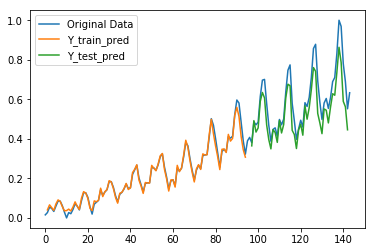

In [59]:
# make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# shift train predictions for plotting
Y_train_pred_plot = np.empty_like(normalized_dataset)
Y_train_pred_plot[:, :] = np.nan
Y_train_pred_plot[n_x-1:len(Y_train_pred)+n_x-1, :] = Y_train_pred

# shift test predictions for plotting
Y_test_pred_plot = np.empty_like(normalized_dataset)
Y_test_pred_plot[:, :] = np.nan
Y_test_pred_plot[len(Y_train_pred)+(n_x*2)-1:len(normalized_dataset)-1, :] = Y_test_pred

# plot baseline and predictions
plt.plot(normalized_dataset,label='Original Data')
plt.plot(Y_train_pred_plot,label='Y_train_pred')
plt.plot(Y_test_pred_plot,label='Y_test_pred')
plt.legend()
plt.show()

In [172]:
Y_test

array([[356.],
       [348.],
       [355.],
       [422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.],
       [432.]], dtype=float32)

In [167]:
Y_test_pred.shape, Y_train_pred.shape, dataset.shape

((46, 1), (94, 1), (144, 1))

In [168]:
np.reshape(X_test[0],(2,))

array([315., 301.], dtype=float32)

In [169]:
model.predict(np.reshape(X_test[5],(-1,2)))

array([[470.1346]], dtype=float32)